# Power Spectral Density of White Noise 

In this notebook, we will consider the relation between the power, variance, autocorrelation function and power spectral density of a filtered noise process. 

Typically, a random process has infinite energy but finite and nonzero power. Thus, a random process can be classified as a power signal. There is a strong relation between the autocorrelation funciton $R_X(\tau)$ of a **wide sense stationary** proces $X(t)$ and its power spectral density $S_X(f)$: the power spectral density $S_X(f)$ is the Fourier transform of the autocorrelation function $R_X(\tau)$.
$$
    R_X(\tau) \underset{\mathcal{F}^{-1}}{\stackrel{\mathcal{F}}{\rightleftharpoons}} S_X(f) 
$$

where $\mathcal{F}$ is the Fourier transform a signal $f(t)$ defined as 

$$
F(f) = \mathcal{F}[f(t)] = \int_{-\infty}^{\infty} f(t) e^{-j 2 \pi f t}dt
$$

and $\mathcal{F}^{-1}$ is the inverse Fourier transform defined as 

$$
f(t) = \mathcal{F}^{-1}[F(f)] = \int_{-\infty}^{\infty} F(f) e^{j 2 \pi f t }df 
$$

Once the power spectral density $S_X(f)$ of a process $X(t)$ is defined, the average power $\mathcal{P}_X$ of the random process can be found as, 

$$
\mathcal{P}_X = \int_{-\infty}^{\infty} S_X(f) df 
$$

Since the variance $\sigma_X^2$ is the average power of a random process, we can write 
$$
R_X(0) = \int_{-\infty}^{\infty} S_X(f) e^{j 2 \pi f 0} df = \mathcal{P}_X = \sigma_X^2
$$

A process $X(t)$ is called white if its power spectral density $S_X(f)$ is constant for all frequency bands. Thus, the power of a white random process is infinite, which implies a true random white process cannot be generated. But, a process whose power spectral density is constant for a wide range of frequencies, the process can be considered as white. Thus, we can think a process as white if its power spectal density is constant for a wide range of frequency band given as $[0, B]$ where $B$ is the bandwidth of the process. 

Consider the power spectral density $S_Y(f)$ of a random process $Y(t)$
$$
S_Y(f) = 
\begin{cases} 
N_0 / 2 & |f| \leq B  \\ 
0 & otherwise 
\end{cases}
$$
The power of $Y(t)$ can be found as 
$$P_Y = N_0 B$$ 
The process $Y(t)$ is a contiuous time process and need to be sampled to be numerically simulated. Let us define a random process 
$$n[k] = Y(n T_s)$$
where $T_s$ is the sampling frequency. We need $n[k]$ to be uncorrelated discrete time random process, in other words, we need the autocorrelation function $R_n[k]$ to be an impulse-like function. To calculate the autocorrelation function $R_n[k]$ of the discrete time process $n[k]$, we first calculate the autocorrelation function $R_Y(\tau)$ of the contiuous time random process $Y(t)$. We have 
$$
R_Y(\tau) = \mathcal{F}^{-1}[S_Y(f)] = N_0 B sinc(2 B \tau)
$$
where 
$$sinc(t) = \dfrac{sin(\pi t)}{\pi t}$$
Since $n[k] = Y(k T_s)$ we have, 
$$R_n[k] = R_Y(k Ts) = N_0 B sinc(2 B k T_s), \; k = 1, 2, \ldots$$
If sampling is performed such that 
$$T_s = \dfrac{m}{2B}, \; m = 1, 2, \ldots$$
we have 
$$R_n[k] = 0, \; k = 1, 2, \ldots$$
Thus the noise samples $n[k]$ are uncorrelated from each other and the contiuous time noise process $Y(t)$ can be recoveered from its samples $n[k]$. 

After this theoretical beckground, we are ready for the simulation of a continuous time noise process whose power spectral density is constant and equals $N_0 / 2$ for a frequency range of $[-B, B]$ where $B$ is the bandwith of the process. From the above discussion, we found that 
$$B = \dfrac{fs}{2}$$
and
$$P_n = N_0 B$$

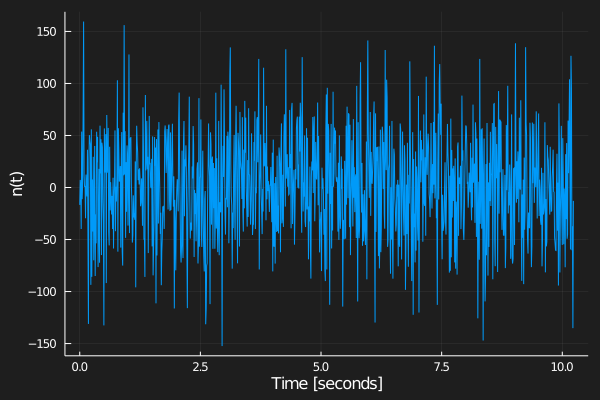

In [6]:
# Load packages 
using FFTW 
using Plots 
using DSP 
using Statistics

# Construct noise signal 
N0 = 50.                                # Single sideband power spectral density
fs = 100                                # Sampling frequency
ts = 1 / fs                             # Sampling time 
ln = 2^10                               # Number of noise samples 
tn = (0 : ln - 1) * ts                  # Noise vector 
n = sqrt(N0 / 2 * fs) * randn(ln)       # Sampled noise  

# Plot the noise 
plot(tn, n)
xlabel!("Time [seconds]") 
ylabel!("n(t)")

Note the variance $\sigma_n^2$ of the sampled noise is $N_0 \dfrac{fs}{2} = 1000$ as explained above. We can check the variance of the noise samples  

In [7]:
var(n) 

2512.9183244388337

which implies we are quite good. Note that, actually we plotted the contiunouus time random process $Y(t)$ from it is samples $n[k]$. We can calculate the autocorrelation function $R_Y(\tau)$ of $Y(t)$. We found that $R_Y(\tau) = N_0 B sinc(2 B \tau)$

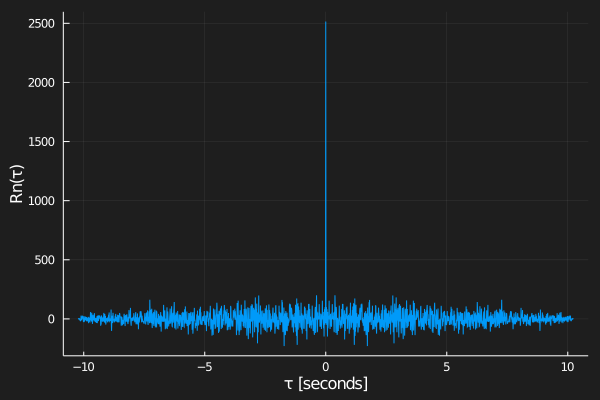

In [8]:
# Compute autocorrelation function. 
Rn = xcorr(n, n) / (ln - 1)
τ = (-ln + 1 : ln - 1) * ts 
lr = length(Rn) 

# Plots 
plot(τ, Rn)
xlabel!("τ [seconds]") 
ylabel!("Rn(τ)")

Note that to calculate $R_Y(\tau)$ we used `xcorr` function which calculates the autocorrelation function $R_n[k]$ of a sampled noise $n[k]$. However we want to calculate the autocorrelation function $R_Y(\tau]$. Considering that Gauissian process ergodic, we have
$$
R_Y(\tau) = E[n(t)n(t + \tau)] = \dfrac{1}{T_d} \int_{0}^{T_d} n(t)n(t + \tau) dt \approx \dfrac{1}{T_d} \sum_{l = 1}^{L - 1} n[l]n[l + k] T_s = \dfrac{1}{L - 1} \sum_{l = 1}^{L - 1} n[l]n[l + k]
$$
where $E[X]$ denotes the expected value of the random process $X$ and $T_d$ is the duration of the random process $Y(t)$. Hence, we normlized the result of `xcorr` function by the term `ln` which is the number of samples $n[k]$ taken from the continuous time process $Y(t)$.

We have defined the power spectral density $S_Y(f)$ of random process $Y(t)$ to be the Fourier transform of its autocorrelation function $R_Y(\tau)$. From the properties of the autocorrelation function $R_Y(\tau)$, it can be shown that power spectral density $S_Y(f)$ is a real function of $f$. `fft` always returns complex valued signals. Thus, to get a real $S_n(f)$, we have to take the magnitude of output of the `fft` function. 

Pfr = 2514.8026540157043


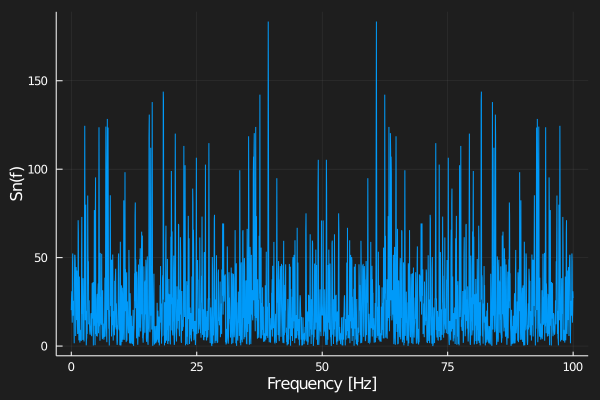

In [12]:
# Fourier tranform of autocorrelation function
xrf = fft(Rn) * ts
psdr = abs.(xrf) 
ffr = (0 : 1 / (lr - 1) : 1) * fs
Δfr = fs / (lr - 1) 
Pfr = sum(psdr[1 : end - 1]) * Δfr
@show Pfr

# Plot 
plot(ffr, psdr) 
xlabel!("Frequency [Hz]") 
ylabel!("Sn(f)")

Note that the noise average power calculated using $S_n(f)$ is quite close to its theoretical value, which is the variance $\sigma_n^2 = 2512.9183244388337$ of the sampled noise. 

Another method for the calculation of the power spectral density uses a sample waveoform of the process directly. The power spectal density $S_X(f)$ of a continous time random process $X(t)$ is defined as 
$$
S_x(f) =  \lim_{T \mapsto \infty} \dfrac{|X(f)|^2}{T}
$$
Thus, $S_n(f)$ can be computed numerically as 
$$
S_n(f) \approx \dfrac{|X(f)|^2}{T} = \dfrac{|X(f)|^2}{(l - 1) T_s} 
$$
and the total average power $\mathcal{P}_n$ can be calculated as 
$$
\mathcal{P}_n = \int_{0}^{fs} S_n(f) df = \sum_{n = 1}^{l - 1} \dfrac{|X(f)|^2}{(l - 1) T_s} \Delta f 
$$
where $\Delta f = \dfrac{f_s}{l - 1}$ is the frequency resolution of the `fft` operation. 

Pfn = 2514.3298475218166


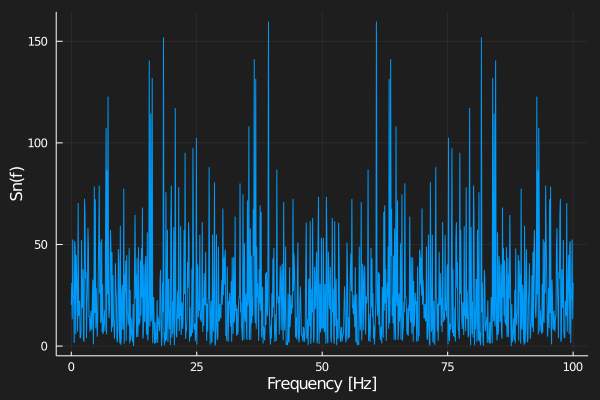

In [15]:
# Compute power spectral density 
xfn = fft(n) * ts
psdn = abs.(xfn).^2 / (ln - 1) / ts 
ffn = (0 : 1 / (ln - 1) : 1) * fs
Δf = fs / (ln - 1)
Pfn = sum(psdn[1 : end - 1]) * Δf
@show Pfn

# Plots 
plot(ffn, psdn) 
xlabel!("Frequency [Hz]") 
ylabel!("Sn(f)") 

Notice that the power computed usign the noise sample waveform directly is quite close the theoretical value $\sigma_n^2 = 2512.9183244388337$. 

As a last step we compute the power in the time domain using the noise samples diretly. 

In [16]:
Pt = sum(n[1 : ln - 1].^2) / (ln - 1)

2514.741294080489

Again the power calculated in the time domain is close to its theoretical value $\sigma_n^2 = 2512.9183244388337$